In [17]:
# Not using any tf libraries so far...
import numpy as np 
import matplotlib.pyplot as plt

In [18]:
# sigmoid function  
def sigmoid(x):
    return (1/(1+np.exp(-x)))
# derivativ of sigmoid function  
def sigmoidprime(x):
    return (sigmoid(x)*(1-sigmoid(x)))

In [19]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

#### Implement Perceptron.

In [20]:
# To make you familiar with classes we will implement the perceptron as a class.
# Check https://docs.python.org/3/tutorial/classes.html if you need basic help with python classes.

class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        self.last_input = np.array([])
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 0.01.
        self.alpha = 1
        self.drive = 0.0
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        self.last_input=input
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        weighted_sum =  self.weights @ input + self.bias 
        self.drive = weighted_sum
        # An alternative would be:
        # weighted_sum =  np.dot(input, self.weights) + self.bias

        # 2. Return a value between 1 or a 0, depending on whether the perceptron surpassed the threshold. 
        # You can use 'int(...)' to make an integer out of a boolean.
        return sigmoid(weighted_sum)
        
    def training_step(self, input, label):
        # Perform a whole training step (including the forward step).
        # 1. Forward step.
        prediction = self.forward_step(input)
        # 2. Calculate the weight updates.
        delta_weights = self.alpha * (label - prediction) * input
        # 3. Calculate the bias update. We consider 1 as the "input" to the bias, so that we can treat it just like the other weights.
        delta_bias = self.alpha * (label - prediction) * 1
        # 4. Update weights and bias.
        self.weights += delta_weights
        self.bias += delta_bias

    def update(self,delta):
        #compute the delta of the bias
        delta_biases = delta * self.alpha
        #update bias
        self.bias -= delta_biases
        
        delta_weights = [None]*self.input_units
        #compute the weight_delta = alpha  * delta * activations(last layer)
        for i in range(self.input_units):
            delta_weights[i] = self.alpha * delta * self.last_input[i]
            self.weights[i] -= delta_weights[i]

In [21]:
class MLP:
    #initializes the MLP
    def __init__(self):
        self.hidden_layer=[Perceptron(2),Perceptron(2), Perceptron(2),Perceptron(2)]
        self.output_layer=[Perceptron(4)]
        self.lastoutput= 0.0
        self.hidden_output = []
    
    def forward_step(self, input):
        this_hidden_output=[]
        
        #goes through the hidden layer and saves the output in this_hidden_output
        for perc in range(len(self.hidden_layer)):
            this_hidden_output.append(self.hidden_layer[perc].forward_step(input))
        
        #feeds output of the hidden layer to the output layer
        self.lastoutput = self.output_layer[0].forward_step(this_hidden_output)
       
        return self.lastoutput
        
    def backwards_step(self, target):
        
       
        #delta of the output neuron -(target-prediction)*sigmoidprime(of the drive at this neuron the earlier)
        delta =  -(target-self.lastoutput) *  (sigmoidprime(self.output_layer[0].drive))
        
        #update the output neuron
        self.output_layer[0].update(delta)
        #updates the whole hidden layer
        for i in range(4):
            #delta for the perceptrons in the hiddenlayer delta*weight*sigmoidprime(drive of this neuron)
            delta_new = self.output_layer[0].weights[i] * delta * sigmoidprime(self.hidden_layer[i].drive)

            self.hidden_layer[i].update(delta_new)
        
                
                      
        

In [22]:
# Initialize a MLP.
# Initialize list to store performance.
mlp = MLP()
accuracies = []
steps =[]
losses=[]
# We train for 1000 steps.
for i in range(1000):
    steps.append(i)
    
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    index = np.random.randint(len(x))
    sample = x[index]
    label = t_xor[index]
    # 2. Perform a training step.
    
    mlp.forward_step(sample)
    mlp.backwards_step(label)


    #Calculate the performance over all four possible inputs.
    accuracy_sum = 0.0
    loss_sum =0.0
    for k in range(4):
        output = mlp.forward_step(x[k])   # feed each input to the mlp (only foward step!)
        accuracy_sum += int(abs(output - t_xor[k])<=0.50)# this turns true if the perceptron gave the right output --> then adds 1 
        loss_sum +=(t_xor[k]-output)**2 
        
    accuracy = (accuracy_sum / 4 ) 
    loss = (loss_sum/4)
    # we divide through all the training examples
    accuracies.append(accuracy)
    losses.append(loss)

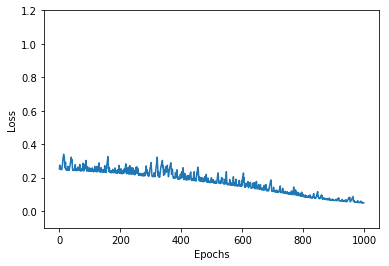

In [23]:
#this figure shows the Loss over the Epochs
plt.figure()
plt.plot(steps, losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

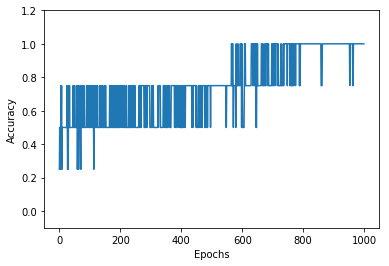

In [24]:
#this figure shows the Accuracy over the Epochs
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()